In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 32kB/s 


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D  



In [ ]:
categories=["airplane","apple","bird","face","fish","flower","house","star","train","tree"]

airplane=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/airplane.npy')
apple=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/apple.npy')
bird=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/bird.npy')
face=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/face.npy')
fish=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/fish.npy')
flower=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/flower.npy')
house=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/house.npy')
star=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/star.npy')
train=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/train.npy')
tree=np.load('/content/drive/My Drive/Colab Notebooks/Datasets/tree.npy')
print(airplane.shape)
print(apple.shape)
print(bird.shape)
print(face.shape)
print(fish.shape)
print(flower.shape)
print(house.shape)
print(star.shape)
print(train.shape)
print(tree.shape)

(151623, 784)
(144722, 784)
(133572, 784)
(161666, 784)
(134150, 784)
(144818, 784)
(135420, 784)
(137619, 784)
(127948, 784)
(144721, 784)


In [ ]:
airplane=np.c_[airplane,np.zeros(len(airplane))]
apple=np.c_[apple,np.ones(len(apple))]
bird=np.c_[bird,2*np.ones(len(bird))]
face=np.c_[face,3*np.ones(len(face))]
fish=np.c_[fish,4*np.ones(len(fish))]
flower=np.c_[flower,5*np.ones(len(flower))]
house=np.c_[house,6*np.ones(len(house))]
star=np.c_[star,7*np.ones(len(star))]
train=np.c_[train,8*np.ones(len(train))]
tree=np.c_[tree,9*np.ones(len(tree))]

In [ ]:
def plot_samples(input_array,rows=1,cols=5,title=''):
    fig,ax=plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)
    
    for i in list(range(0,min(len(input_array),(rows*cols)))):
        a=fig.add_subplot(rows,cols,i+1)
        imgplot=plt.imshow(input_array[i,:784].reshape((28,28)),cmap='gray_r',interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

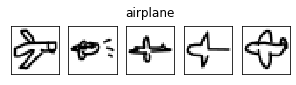

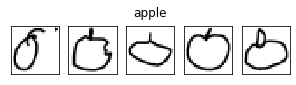

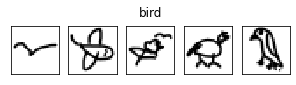

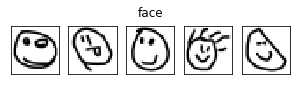

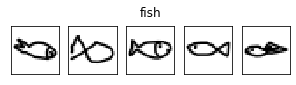

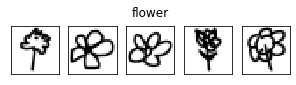

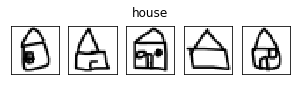

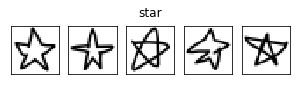

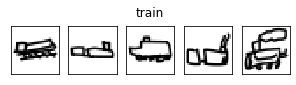

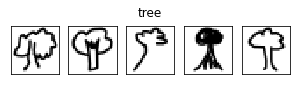

In [ ]:
plot_samples(airplane,title='airplane')
plot_samples(apple,title='apple')
plot_samples(bird,title='bird')
plot_samples(face,title='face')
plot_samples(fish,title='fish')
plot_samples(flower,title='flower')
plot_samples(house,title='house')
plot_samples(star,title='star')
plot_samples(train,title='train')
plot_samples(tree,title='tree')

In [ ]:
X=np.concatenate((airplane[:10000,:-1],apple[:10000,:-1],bird[:10000,:-1],face[:10000,:-1],fish[:10000,:-1],flower[:10000,:-1],house[:10000,:-1],star[:10000,:-1],train[:10000,:-1],tree[:10000,:-1]),axis=0).astype('float32')
y=np.concatenate((airplane[:10000,-1],apple[:10000,-1],bird[:10000,-1],face[:10000,-1],fish[:10000,-1],flower[:10000,-1],house[:10000,-1],star[:10000,-1],train[:10000,-1],tree[:10000,-1]),axis=0).astype('float32') 
X_train,X_test,y_train,y_test=train_test_split(X/255.,y,test_size=0.5,random_state=0)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 784), (50000,), (50000, 784), (50000,))

In [ ]:
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((50000, 28, 28, 1), (50000, 28, 28, 1), (50000, 10), (50000, 10))

In [ ]:
model=Sequential()
model.add(Conv2D(32,(5,5),padding='same',
          input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Conv2D(64,(5,5),padding='same',
          input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=4)

Epoch 1/4
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6255 - accuracy: 0.8049 - val_loss: 0.3047 - val_accuracy: 0.9075
Epoch 2/4
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3353 - accuracy: 0.9049 - val_loss: 0.2641 - val_accuracy: 0.9212
Epoch 3/4
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2715 - accuracy: 0.9208 - val_loss: 0.2529 - val_accuracy: 0.9277
Epoch 4/4
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2329 - accuracy: 0.9322 - val_loss: 0.2307 - val_accuracy: 0.9309


Prediction from the neural network:

 [[6.52379482e-18 6.89894995e-16 3.60510689e-17 6.50350097e-16
  1.12443400e-21 9.29787763e-22 1.00000000e+00 1.39578953e-18
  5.45940817e-18 1.00627076e-17]]


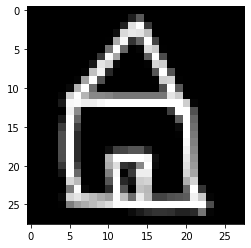



Final Output: house


In [ ]:
example = X_test[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction from the neural network:\n\n {}".format(prediction))
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
categories=["airplane","apple","bird","face","fish","flower","house","star","train","tree"]
print("\n\nFinal Output: {}".format(categories[np.argmax(prediction)]))

In [ ]:
!pip install opencv-python

(1, 28, 28, 1)


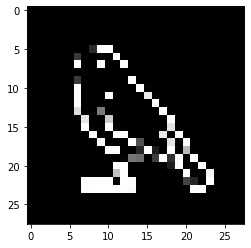

In [ ]:
import cv2
img=cv2.imread('/content/drive/My Drive/Colab Notebooks/Images/bird.png',0)
img=cv2.resize(img,(28,28),cv2.INTER_AREA)
plt.imshow((img.reshape((28,28))),cmap='gray_r')
arr=np.array(img-255)
arr=np.array(arr/255.)
new_img=arr.reshape(1,28,28,1).astype('float32')
print(new_img.shape)

In [ ]:
processed=new_img
prediction=model.predict(new_img)
categories=["airplane","apple","bird","face","fish","flower","house","star","train","tree"]
print("\n\nFinal Output: {}".format(categories[np.argmax(prediction)]))



Final Output: bird


In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 144.4MB 117kB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 256kB 40.5MB/s 
     |████████████████████████████████| 921kB 39.7MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=e056140e3fc4abc37a45402f7f0cf1cad5bcba136475cb99d654305c371d3f18
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0

In [ ]:
model.save('model.h5')

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model,'/content/drive/My Drive/Colab Notebooks/tfjs_target_dir' )

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
